# CWUR Unsupervised Machine Learning - Clustering

## 1. Importing libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing data

In [48]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [49]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [50]:
# Import dataset

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200.csv'))

## 2. Data Cleaning, Manipulations, and Preprocessing

##### Removing irrelevant columns

In [51]:
# Drop index column

df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])

In [52]:
df_cwur.dtypes

world_rank_CWUR                int64
university_name               object
country                       object
national_rank                  int64
quality_of_education_rank      int64
alumni_employment_rank         int64
quality_of_faculty_rank        int64
publications_rank              int64
influence_rank                 int64
citations_rank                 int64
broad_impact_rank            float64
patents_rank                   int64
overall_score_CWUR           float64
year                           int64
dtype: object

In [53]:
# Removing non numerical columns and other irrelveant columns

df_cwur = df_cwur.drop(columns = ['university_name', 'country', 'national_rank', 'overall_score_CWUR'])

##### Missing values

In [54]:
# Check for missing values

df_cwur.isnull().sum()

world_rank_CWUR                0
quality_of_education_rank      0
alumni_employment_rank         0
quality_of_faculty_rank        0
publications_rank              0
influence_rank                 0
citations_rank                 0
broad_impact_rank            200
patents_rank                   0
year                           0
dtype: int64

In [55]:
df_cwur = df_cwur.drop(columns = ['broad_impact_rank'])

Despite there being 200 missing values in the broad_impact_rank column, I cannot remove or replace them as that could lead to potential bias in the data. I will refrain from using this column in regression analysis.

##### Duplicates check

In [56]:
# Create a dataframe with just duplicated values

dups = df_cwur.duplicated()

In [57]:
# Check size of duplicated dataframe

dups.shape 

(600,)

No duplicates

##### Extreme values checks

In [58]:
df_cwur.describe()

,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,patents_rank,year
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,83.833333,133.046667,161.585000,100.326667,101.565000,103.231667,100.995000,154.556667,2013.833333
std,55.322447,115.659687,159.273778,72.780847,100.335127,102.066697,97.084296,181.345951,1.068078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000
25%,38.000000,45.000000,51.750000,38.750000,38.000000,38.750000,38.000000,41.000000,2013.000000
50%,75.500000,101.000000,101.000000,85.500000,80.000000,81.000000,78.000000,100.000000,2014.000000
75%,125.250000,189.500000,205.500000,173.500000,127.000000,131.250000,125.000000,181.500000,2015.000000
max,200.000000,367.000000,567.000000,218.000000,980.000000,834.000000,812.000000,871.000000,2015.000000


##### Standardization?

## 3. Elbow technique

In [59]:
num_cl = range(1, 16) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [60]:
score = [kmeans[i].fit(df_cwur).score(df_cwur) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[-65830416.31999999,
 -43401643.27655502,
 -34536034.07845283,
 -27884122.45801098,
 -24657377.891263057,
 -21931110.107076805,
 -19925412.04326973,
 -18216595.834408194,
 -16816690.302562505,
 -15782152.11202484,
 -14846763.07045605,
 -14269569.274077164,
 -13485762.047912655,
 -12661705.731346084,
 -12304564.055345433]

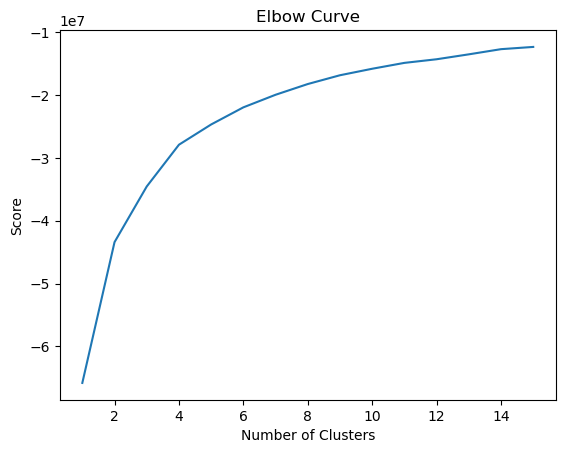

In [61]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Choosing the number of clusters for the k-means algorithm. 

#####  There is a decently large jump from 3 to 4 and then the slope starts to decrease after that but does not exactly flatten like expected? The increase in score starts to lessen around 8-10 clusters so I have chosen 8 clusters the the amount for this dataset. 

## 5. Run the k-means algorithm.

In [62]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 8) 

In [63]:
# Fit the k-means object to the data.

kmeans.fit(df_cwur)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans()

## 6. Attach a new column to the dataframe with the resulting clusters.

In [64]:
df_cwur['clusters'] = kmeans.fit_predict(df_cwur)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [65]:
df_cwur.head()

,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,patents_rank,year,clusters
0,1,7,9,1,1,1,1,5,2012,0
1,2,9,17,3,12,4,4,1,2012,0
2,3,17,11,5,4,2,2,15,2012,0
3,4,10,24,4,16,16,11,50,2012,0
4,5,2,29,7,37,22,22,18,2012,0


In [66]:
df_cwur['clusters'].value_counts()

3    215
0    134
6     77
5     67
7     41
1     34
2     28
4      4
Name: clusters, dtype: int64

## 7. Create a few different visualizations using the clustered data to see the results in terms of the clusters

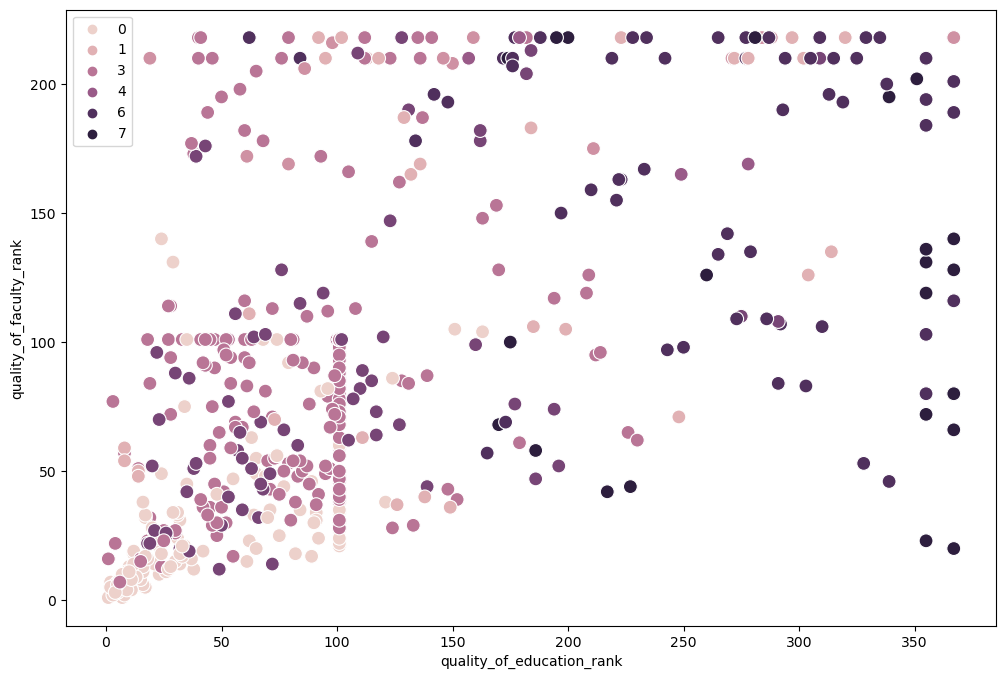

In [67]:
# Plot the clusters for the "quality_of_education_rank" and "quality_of_faculty" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_cwur['quality_of_education_rank'], y = df_cwur['quality_of_faculty_rank'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('quality_of_education_rank') # Label x-axis.
plt.ylabel('quality_of_faculty_rank') # Label y-axis.
plt.show()

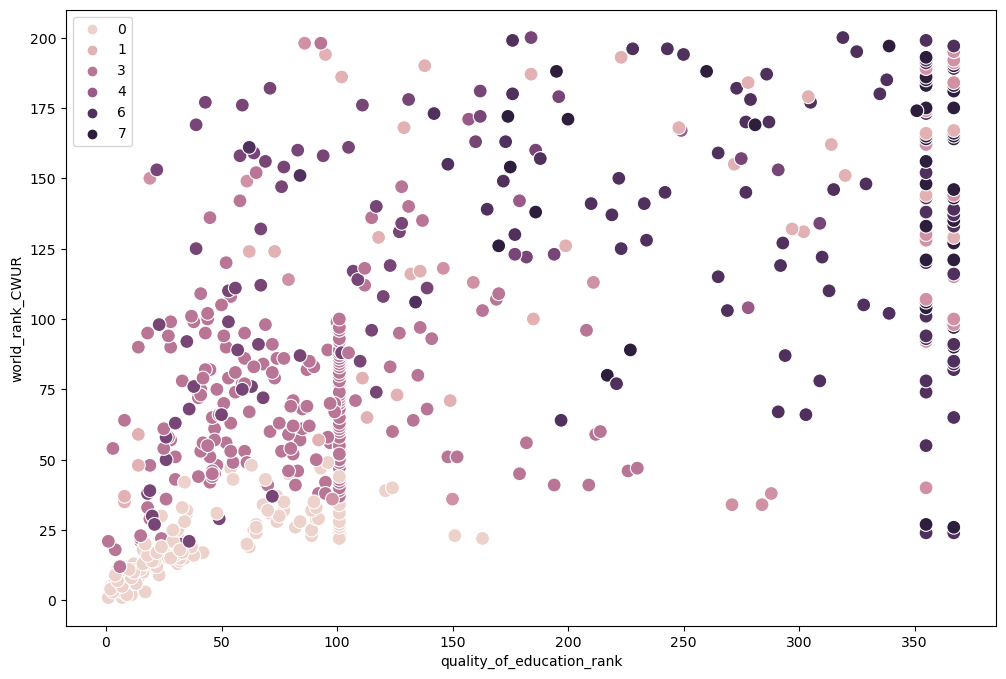

In [68]:
# Plot the clusters for the "quality_of_education_rank" and "world_rank_CWUR" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_cwur['quality_of_education_rank'], y = df_cwur['world_rank_CWUR'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('quality_of_education_rank') # Label x-axis.
plt.ylabel('world_rank_CWUR') # Label y-axis.
plt.show()

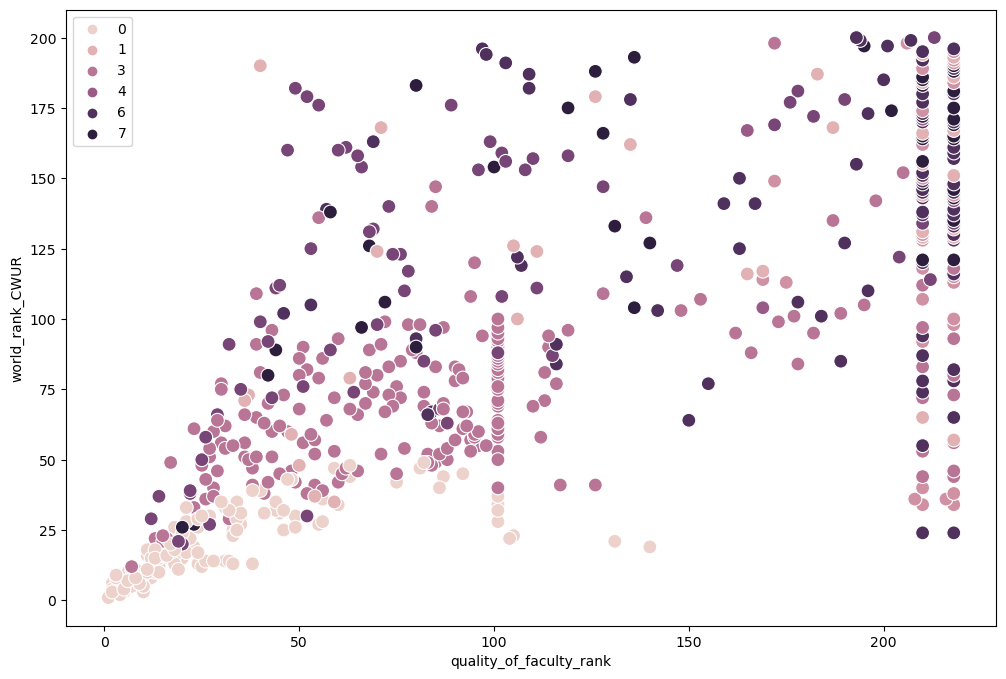

In [70]:
# Plot the clusters for the "quality_of_faculty_rank" and "world_rank_CWUR" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_cwur['quality_of_faculty_rank'], y = df_cwur['world_rank_CWUR'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('quality_of_faculty_rank') # Label x-axis.
plt.ylabel('world_rank_CWUR') # Label y-axis.
plt.show()

## 8. Discuss how and why the clusters make sense. If they don't make sense, explain why you'll need to explore the data further.

While the clusters do make slightly more sense than the raw data, they are still scattered about everywhere. The graphs were originally run with only 3 clusters rather than 8 but the results are still similar. 

The lightest cluster (0) is typically composed of universities within the top 50, which would make this most likely have American universities. The next cluster (3) is more in the middle of the graphs, generally composed of universities within rankings 50-100. The darker clusters (6 and 7) typically are composed of universities with ranking scores higher than 100 and tend to have individual factors that are higher in number than others.

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your finds.

In [74]:
df_cwur.groupby('clusters').agg({'world_rank_CWUR':['mean', 'median'], 
                            'quality_of_education_rank':['mean', 'median'], 
                            'alumni_employment_rank':['mean', 'median'],
                            'quality_of_faculty_rank':['mean', 'median'],
                            'publications_rank':['mean', 'median'],
                            'influence_rank':['mean', 'median'],
                            'citations_rank':['mean', 'median'],
                            'patents_rank':['mean', 'median']})

world_rank_CWUR        quality_of_education_rank         \
                    mean median                      mean median   
clusters                                                           
0              19.634328   17.5                 42.805970   29.5   
1             127.823529  130.0                182.058824  143.5   
2             120.500000  116.5                272.428571  355.0   
3              71.516279   69.0                 82.976744   90.0   
4             146.000000  154.5                215.750000  214.0   
5             114.014925  117.0                 93.388060   71.0   
6             134.402597  139.0                286.545455  305.0   
7             146.365854  164.0                323.170732  355.0   

         alumni_employment_rank        quality_of_faculty_rank         \
                           mean median                    mean median   
clusters                                                                
0                     46.619403   31.0               30.029851   20.0   
1                    248.529412  192.5              147.676471  176.0   
2                     76.107143   43.5              209.071429  210.0   
3                    106.074419  101.0               86.958140   85.0   
4                     29.000000   29.5              190.500000  189.5   
5                    384.223881  404.0               84.970149   70.0   
6                    135.701299  128.0              177.584416  210.0   
7                    512.414634  478.0              157.853659  210.0   

         publications_rank        influence_rank        citations_rank         \
                      mean median           mean median           mean median   
clusters                                                                        
0                21.947761   18.5      22.746269   18.5      21.880597   19.0   
1               152.088235  123.0     153.735294  136.5     165.529412  114.0   
2               256.571429  289.0     331.285714  300.0     326.928571  321.0   
3                81.572093   76.0      82.423256   76.0      78.706977   69.0   
4               803.250000  804.5     747.750000  751.0     548.750000  507.5   
5               117.940299  108.0      91.611940   86.0     130.522388  114.0   
6               135.012987  126.0     155.779221  147.0     122.545455  107.0   
7               160.829268  143.0     135.195122  102.0     136.219512  134.0   

         patents_rank         
                 mean median  
clusters                      
0           39.701493   28.5  
1          701.558824  737.0  
2          123.928571  114.0  
3           87.716279   99.0  
4          792.250000  780.5  
5          287.343284  307.0  
6          182.467532  159.0  
7          116.121951  100.0

As stated in step 8, cluster 0 generally has universities with the best world rankings followed by cluster 3. Cluster 7 (the darkest cluster) has the worst average ranking, as expected, but cluster 4 has the second worst ranking (but this is likely due to it only having 4 points). 

Cluster 0 generally has the best average stats, with its highest average ranking factors being quality of education and alumni employment. This is likely because universities tended to vary in these factors the most: many top universities don't necessarily have the highest quality of education but other factors greatly help to boost their overall rank. The only other group that has an average factor better than cluster 0 is cluster 4 with a 29 for alumni employment rank, but again this is likely skewed due to the small size of the cluster.

Overall these clusters do not tell much that was not already seen in the pairplot generated in the previous steps. Elite universities tend to have better rankings in multiple factors whereas the worst out of the top 200 universities often have multiple factors that could possibly be considered outliers when looking at a scatterplot of the factors. 

## 10. Propose what these results could be useful for in future steps of an analytics pipeline. 

Some of the clusters could possibly be useful (mainly clusters 0, 3 and 7). These clusters seem to have a deep enough sample to draw some conclusion towards like general average world rankings and average rankings for certain factors. For these clusters, the results could possibly be used to predict factors such as projected world rankings based on a certain numerical factor.

There are some significant caveats, however, when using the kmeans algorithm for this dataset. For one, due to the large size of the dataset, it was difficult to group all of the data points into neat clusters. Many of them often had some points that looked like outliers compared to some of the other points. In addition, some of the clusters varied in size significantly compared to the others. For example, cluster 4 only contains 4 datapoints so looking at the descriptive statistics for a group with such a small size may not be accurate. The general variance of the data can make it difficult to see how the clusters could be categorized into certain groups, especially when there are so many different variables in the data to look at. 